In [4]:
library(data.table)
library(ggplot2)
library(plotrix)


In [6]:
HBp <- fread(file = '../python/prova_agents.csv', header=FALSE, sep=",", nrows=2)
HBp1 <- fread(file = '../python/prova_agents.csv', header=FALSE, skip=2, sep=",", nrows=2)

HBp <- cbind(as.numeric(HBp[1,]), as.numeric(HBp[2,]) / sum(HBp[2,]))
HBp1 <- cbind(as.numeric(HBp1[1,]), as.numeric(HBp1[2,]) / sum(HBp1[2,]))

HBp<-HBp[order(HBp[,1]),]
HBp1<-HBp1[order(HBp1[,1]),]

[1] NA

Warning message in weighted.hist(x1, y1, col = rgb(0.05, 0, 1, 0.7), main = "title", :
“Areas will not relate to frequencies”

png 
  2

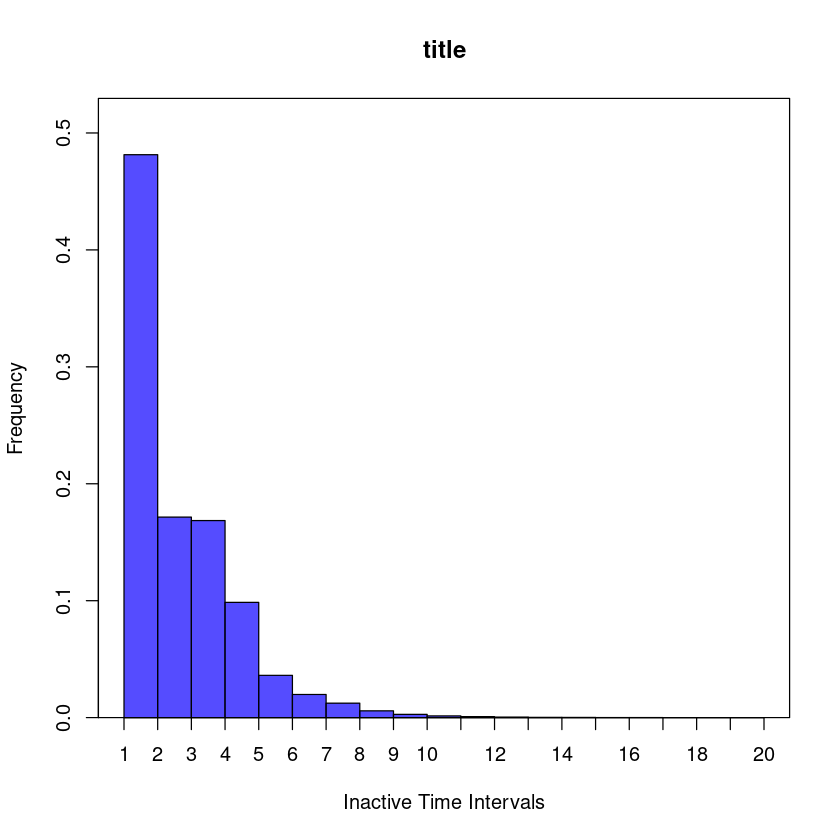

In [21]:
x1 <- HBp[1]
y1 <- HBp[2]
x2 <- HBp1[,1]
y2 <- HBp1[,2]

#y1 <- log(y1)
#y2 <- log(y2)
svg(filename="../../tex/Maggiora/img/active_hist.svg", 
    width=5, 
    height=4, 
    pointsize=12)
weighted.hist(
    x1, y1, 
    col=rgb(0.05,0,1,0.7),
    main="title", 
    xlab="Active Time Intervals", ylab="Frequency", breaks=length(y1),
)
box()
dev.off()

#svg(filename="../../tex/Maggiora/img/inactive_hist.svg", 
#    width=5, 
#    height=4, 
#    pointsize=12)
weighted.hist(
    x2, y2,
    col=rgb(0.05,0,1,0.7),
    main="title", 
    xlab="Inactive Time Intervals", ylab="Frequency", breaks=length(y2))
box()
#dev.off()

[1] TRUE


Call:
lm(formula = y ~ x)

Coefficients:
 (Intercept)             x  
 0.145131555  -0.662829844  


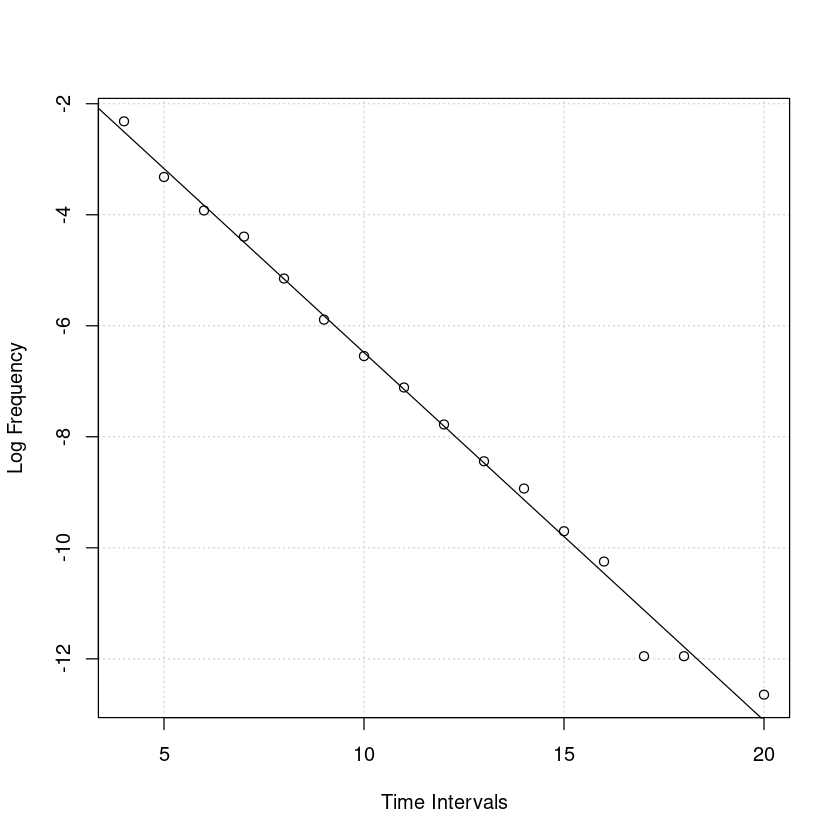

In [22]:
x <- HBp1[-(1:3),1]
y <- log(HBp1[-(1:3),2])
length(x) == length(y)

#m<-nls(y ~ a + b*x + d * x * x, start=list(a=1, b=1, d=-1))
#cor(y,predict(m))

#mm <- lm(y ~ poly(x, 2, raw=TRUE))
#lines(x, mm$fitted.values, lty=2,col="red",lwd=3)

#svg(filename="../../tex/Maggiora/img/time_fit.svg", 
#    width=5, 
#    height=4, 
#    pointsize=12)
plot(x,y, xlab="Time Intervals", ylab="Log Frequency", panel.first=grid())
lm(y ~ x)
abline(lm(y ~ x))
#dev.off()

## 

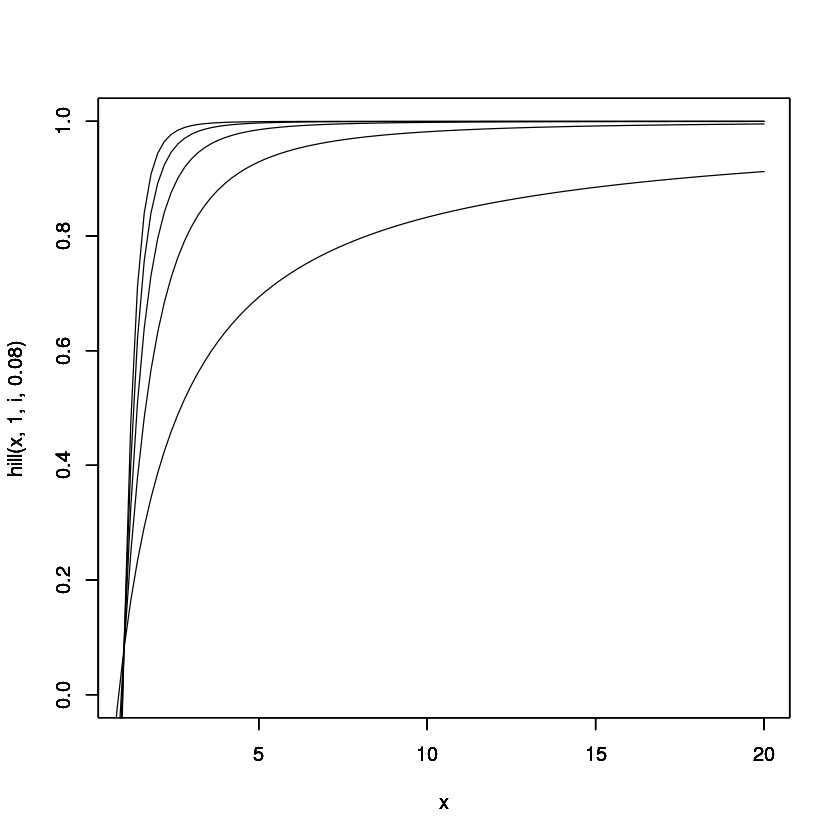

In [165]:
hill <- function(x, k, n, p) { ( -0.5 +( 1 / (1 + (k/(x))^n)) ) * (1-p)/0.5 + p}
for (i in 1:5) {
    curve(hill(x, 1, i, 0.08), 0, 20, xlim=c(1,20), ylim=c(0,1))
    par(new=TRUE)
}